In [1]:
from ot_simple_connector.connector import Connector
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

ModuleNotFoundError: No module named 'ot_simple_connector'

In [2]:
pads_cache_filename = 'c:\\tmp\\pads.csv'
pads_df = None
try:
    pads_df = pd.read_csv(pads_cache_filename)
except:
    pass

if pads_df is None:
    conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
    query = '| __read__ path=oms_with_dns_v7'
    job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
    print(job.status)
    res = job.dataset.load()
    pads_df = pd.DataFrame(res)
    pads_df.to_csv(pads_cache_filename)
pads_df


NameError: name 'Connector' is not defined

In [3]:
pads_df.dtypes

Unnamed: 0      int64
IDMestor        int64
IDPad           int64
padNum         object
IDGzu         float64
IDWell        float64
wellNum        object
IDWellNag     float64
IDVrb         float64
IDPlast        object
IDOis         float64
IDBaspro       object
DNS            object
IDKs          float64
dtype: object

In [4]:
pl_cache_filename = 'c:\\tmp\\pipelines.csv'
full_df = None
try:
    full_df = pd.read_csv(pl_cache_filename)
except:
    pass

if full_df is None:
#     schema_id = 1750000002
    conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
    query = '| __read__ path=pipeline/pipeline'
#     query +='| where schema_id={schema_id}'
    job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
    print(job.status)
    res = job.dataset.load()
    full_df = pd.DataFrame(res)
    full_df.to_csv(pl_cache_filename)
full_df

,Unnamed: 0,rs_schema_id,schema_id,pipeline_id,part_id,node_id_end,node_id_start,L,simple_part_id,node_name_start,...,thread_number,pipe_material,cover_ext,pipeline_type,placing,creation_date,mestor_name,schema_name,rs_schema_name,cover_int
0,0,1750001220,1750001202,1750003540,1750011472,1750009882,1750009878,16179.0,1750012996,задв. №146,...,1,сталь 20А,Полилен 40-ЛИ-63 + праймер НК-50,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
1,1,1750001220,1750001202,1750003540,1750004260,1750009129,1750009876,812.0,1750004674,"т.в.з.№164,165",...,1,Ст.В20СП,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
2,2,1750001220,1750001202,1750003540,1750031482,1750009878,1750035084,2688.0,1750037290,задв. 155,...,1,Ст.В20СП,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
3,3,1750001220,1750001202,1750003540,1750004270,1750035084,1750009129,500.0,1750004684,задв. 158,...,2,сталь 09Г2С,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
4,4,1750001220,1750001202,1750003540,1750004293,1750009881,1750009880,2430.0,1750004712,вр. задв.№141,...,1,Ст.В20,Праймер,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033,12033,1750000386,1750000386,1750007321,1750015475,1750003592,1750000108,85.0,1750017561,к.42,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12034,12034,1750000386,1750000386,1750007321,1750006258,1750003395,1750000293,115.0,1750006951,к.41,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12035,12035,1750000386,1750000386,1750007321,1750006062,1750035068,1750035042,535.0,1750006699,т.вр.к.41,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12036,12036,1750000386,1750000386,1750007321,1750006062,1750010344,1750035068,1623.0,1750028972,т.вр.к.155,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN


In [5]:
full_df.columns

Index(['Unnamed: 0', 'rs_schema_id', 'schema_id', 'pipeline_id', 'part_id',
       'node_id_end', 'node_id_start', 'L', 'simple_part_id',
       'node_name_start', 'altitude_start', 'node_type_start', 'X_start',
       'Y_start', 'node_name_end', 'altitude_end', 'node_type_end', 'X_end',
       'Y_end', 'D', 'S', 'thread_number', 'pipe_material', 'cover_ext',
       'pipeline_type', 'placing', 'creation_date', 'mestor_name',
       'schema_name', 'rs_schema_name', 'cover_int'],
      dtype='object')

In [6]:
t = tuple(full_df.pipeline_type.unique())
type_o, type_w, type_g = t
t

('Все трубопроводы транспортирующие нефть ',
 'Все трубопроводы транспортирующие воду ',
 'Все трубопроводы транспортирующие газ ')

In [7]:
full_df.mestor_name.unique()

array(['Покамасовское', 'Западно-Асомкинское', 'Ватинское', 'Чистинное',
       'Южно-Аганское', 'Аганское', 'Тайлаковское', 'Северо-Покурское',
       'Западно-Усть-Балыкское', 'Северо-Островное', 'Мегионское',
       'Ново-Покурское', 'Восточно-Охтеурское', 'Аригольское', 'Ининское',
       'Луговое', 'Кетовское', 'Северо-Ореховское', 'Ачимовское',
       'Мыхпайское', 'Узунское', 'Южно-Покамасовское', 'Островное',
       'Южно-Островное', 'Кысомское'], dtype=object)

In [8]:
schema_df = full_df[full_df.pipeline_type=='Все трубопроводы транспортирующие воду ']
schema_df = schema_df[schema_df.mestor_name=='Тайлаковское']
schema_df.schema_id.unique()

array([1750000936, 1750000996, 1750000976, 1750000710, 1750000610,
       1750000894], dtype=int64)

In [9]:
rs_ids = schema_df.rs_schema_id.unique()
rs_ids

array([1750000936, 1750000996, 1751002071, 1750001935, 1751002131,
       1750000610, 1750000894, 1750000710, 1750000976], dtype=int64)

In [10]:
for _id in schema_df.schema_id.unique():
    mask = full_df.schema_id == _id
    if len(full_df[mask].mestor_name.unique()) != 1:
        assert False, 'unexpected water pipeline shared between oilfields!'

rs_id: 1750000936


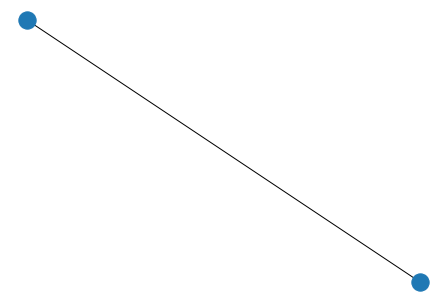

rs_id: 1750000996


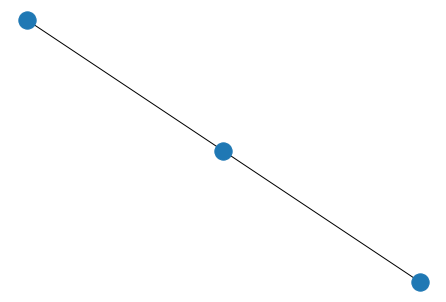

rs_id: 1751002071


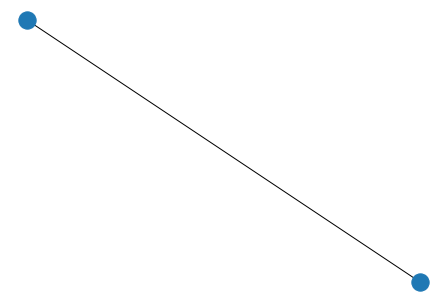

rs_id: 1750001935


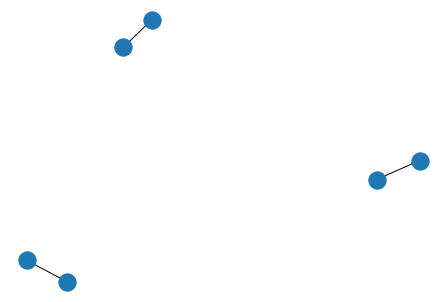

rs_id: 1751002131


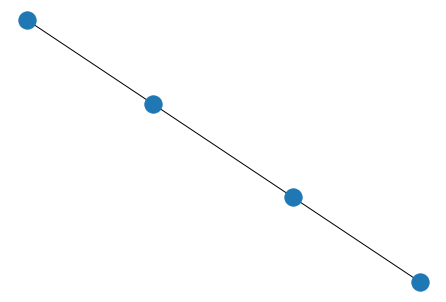

rs_id: 1750000610


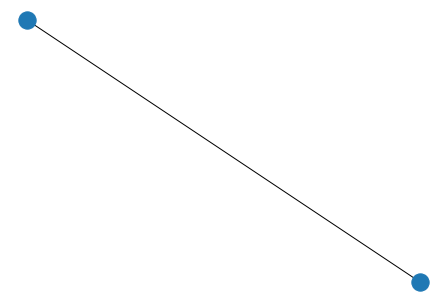

rs_id: 1750000894


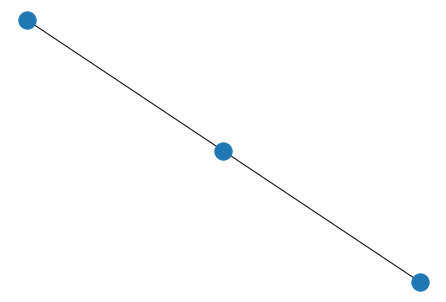

rs_id: 1750000710


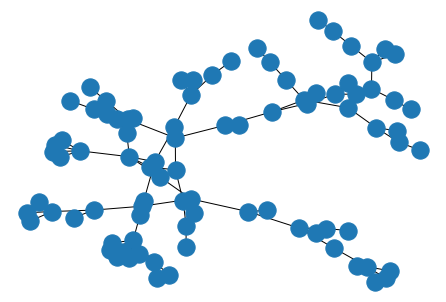

rs_id: 1750000976


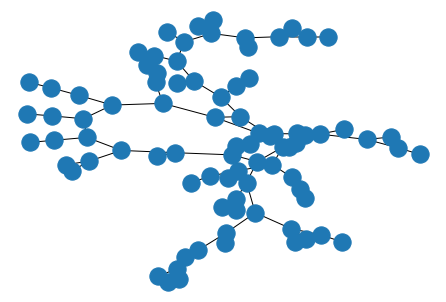

In [11]:
for rs_id in rs_ids:
    print('rs_id:', rs_id)
    graph_df = schema_df[schema_df.rs_schema_id == rs_id]
    graph_df = graph_df[["node_id_start", "node_id_end", ]]
    graph_df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(graph_df)
    nx.draw(G)
    plt.show()

rs_id: 1751002131


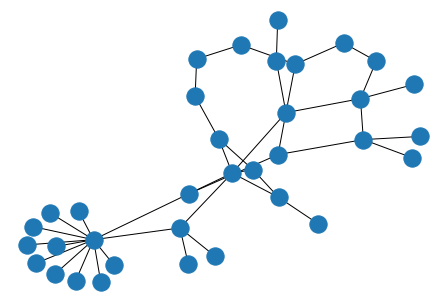

rs_id: 1750000610


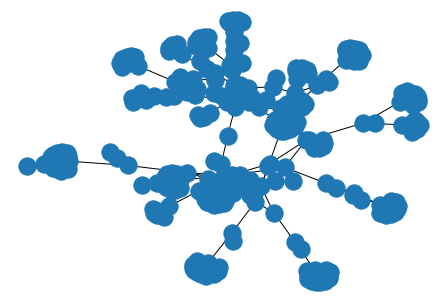

rs_id: 1750000894


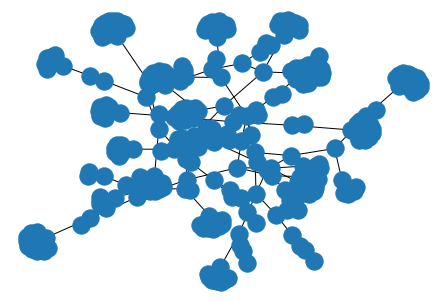

In [12]:
for rs_id in [1751002131, 1750000610, 1750000894]:
    print('rs_id:', rs_id)
    graph_df = full_df[full_df.rs_schema_id == rs_id]
    graph_df = graph_df[["node_id_start", "node_id_end", ]]
    graph_df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(graph_df)
    nx.draw(G)
    plt.show()

In [13]:
# tai_water_df = pd.concat([rs_id, len(full_df[full_df.rs_schema_id == rs_id]) for rs_id in rs_ids])
# tai_water_df.shape 
l = [(rs_id, len(full_df[full_df.rs_schema_id == rs_id])) for rs_id in rs_ids]
print(l)


[(1750000936, 1), (1750000996, 2), (1751002071, 1), (1750001935, 3), (1751002131, 43), (1750000610, 329), (1750000894, 360), (1750000710, 90), (1750000976, 88)]


In [14]:
l = [(rs_id, len(schema_df[schema_df.rs_schema_id == rs_id])) for rs_id in rs_ids]
print(l)

[(1750000936, 1), (1750000996, 2), (1751002071, 1), (1750001935, 3), (1751002131, 3), (1750000610, 1), (1750000894, 2), (1750000710, 90), (1750000976, 88)]


In [15]:
l = [(rs_id, full_df[full_df.rs_schema_id == rs_id].pipeline_type.unique()) for rs_id in rs_ids]
for item in l: print(item)

(1750000936, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750000996, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1751002071, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750001935, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1751002131, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000610, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000894, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000710, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750000976, array(['Все трубопроводы транспортирующие воду '], dtype=object))


In [16]:
rs_ids = [1751002131, 1750000610, 1750000894]
rs_id = 1750000894
df = full_df[full_df.rs_schema_id == rs_id]
df = df[df.pipeline_type == type_w]
# df = df[['node_id_end', 'node_id_start']]
node_list = list(set(df.node_id_end.unique()) | set(df.node_id_start.unique()))
df2 = pd.concat([full_df[(full_df.node_id_end==n_id) | (full_df.node_id_start==n_id)] for n_id in node_list])
df2 = df2[df2.rs_schema_id == rs_id]
df2[['rs_schema_id','node_id_end', 'node_id_start', 'node_name_start', 'node_name_end', 'pipeline_type']].drop_duplicates()

,rs_schema_id,node_id_end,node_id_start,node_name_start,node_name_end,pipeline_type
10176,1750000894,1750022281,1750023653,скв.4221,к.59,Все трубопроводы транспортирующие нефть
10201,1750000894,1750022281,1750023514,скв.4181,к.59,Все трубопроводы транспортирующие нефть
10204,1750000894,1750022281,1750023513,скв.376,к.59,Все трубопроводы транспортирующие нефть
10207,1750000894,1750022281,1750023996,скв.1466,к.59,Все трубопроводы транспортирующие нефть
10213,1750000894,1750022281,1750023673,скв.378,к.59,Все трубопроводы транспортирующие нефть
10216,1750000894,1750022281,1750023197,скв.1223,к.59,Все трубопроводы транспортирующие нефть
10249,1750000894,1750022281,1750023765,скв.4224,к.59,Все трубопроводы транспортирующие нефть
10314,1750000894,1750022333,1750022281,к.59,т.вр.к59,Все трубопроводы транспортирующие нефть
10420,1750000894,1750022333,1750022281,к.59,т.вр.к59,Все трубопроводы транспортирующие воду
10300,1750000894,1750022338,1750021737,к.61,т.вр.к61,Все трубопроводы транспортирующие нефть


In [17]:
node_list = list(set(df2.node_id_end.unique()) | set(df2.node_id_start.unique()))
node_list

[1750022338,
 1750022339,
 1750022281,
 1750023765,
 1750023513,
 1750023514,
 1750023197,
 1750023653,
 1750021737,
 1750034283,
 1750023673,
 1750023996,
 1750022333,
 1750023998]

## Тут я попробую отфильтровать внутрикустовые трубы, по которым в оиспайпе некачественная инфа, а качественную еще не привезли

In [18]:
rs_ids = [1750000710, 1750000976]
# Всё остальное в ведро, как явный мусор

In [19]:
# Когда-нибудь, будет мэп сопоставляющий айдиншики кустов и скважин из OISPipe и из ШТР
# Тогда можно будет отфильтровывать внутрикустовые трубы кодом
# Сейчас это проще сделать руками
df0 = full_df[(full_df.rs_schema_id == 1750000710) | (full_df.rs_schema_id == 1750000976)]
df = df0[(df0.node_type_start==1) & (df0.node_type_end==2)]
# df['pad_num'] = df.node_name_start.apply(lambda s: int(s[2:]))
# df['well_num'] = df.node_name_end.apply(lambda s: int(s[4:]))
df['pad_num'] = df.node_name_start
df['well_num'] = df.node_name_end
df1 = df

df = df0[(df0.node_type_start==2) & (df0.node_type_end==1)]
df['pad_num'] = df.node_name_end
df['well_num'] = df.node_name_start
df2 = df
df = pd.concat([df1, df2])
df[['pad_num', 'well_num']]


<ipython-input-19-52bb8b594d21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pad_num'] = df.node_name_start
<ipython-input-19-52bb8b594d21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['well_num'] = df.node_name_end
<ipython-input-19-52bb8b594d21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,pad_num,well_num
11399,к.22,скв.544
11400,к.17,скв.413
11410,к.13,скв.447
11441,к.23,скв.495
11443,к.2,скв.618
11444,к.23,скв.482
11446,к.2,скв.55
11447,к.4,скв.453
11448,к.4,скв.16
11449,к.2,скв.69


In [20]:
# Сравнение глазами показало, что все 20 труб соединяют куст и принадлежащую ему скважину, значит их все надо выкинуть
df0 = full_df[(full_df.rs_schema_id == 1750000710) | (full_df.rs_schema_id == 1750000976)]
df_wo_interpad_pipes = df0.drop(labels = df.index)
print(df_wo_interpad_pipes.shape)
print(df0.shape)

(158, 31)
(178, 31)


## Это глобальная переменная

In [21]:
node_columns_full = ['node_id', 'node_type', 'X', 'Y', 'node_name', 'altitude']
node_columns_short = ['id', 'type', 'X', 'Y', 'name', 'H']
rs_ids = [1750000710, 1750000976]

## Может быть две версии одной трубы. В исходниках они отличались датой, и надо брать последнню. В этом датасете даты пока нет, поэтому берем какую попало

In [22]:
# full_df.columns
# Index(['Unnamed: 0', 'rs_schema_id', 'schema_id', 'pipeline_id', 'part_id',
#        'node_id_end', 'node_id_start', 'L', 'simple_part_id',
#        'node_name_start', 'altitude_start', 'node_type_start', 'X_start',
#        'Y_start', 'node_name_end', 'altitude_end', 'node_type_end', 'X_end',
#        'Y_end', 'D', 'S', 'thread_number', 'pipe_material', 'cover_ext',
#        'pipeline_type', 'placing', 'creation_date', 'mestor_name',
#        'schema_name', 'rs_schema_name', 'cover_int'],
#       dtype='object')

columns_short = ['rs_schema_id', "pipeline_id", "part_id", "thread_number"] + [col + suff for col in node_columns_full for suff in ['_start', '_end']]
columns_full = ['creation_date'] + columns_short
df1 = df_wo_interpad_pipes[columns_short].drop_duplicates()
df2 = df_wo_interpad_pipes[columns_full].drop_duplicates()
print(df1.shape, df2.shape)
graph_df = df_wo_interpad_pipes[columns_short]
# На ППД Тайлаковского нет этой проблемы, просто скипаем
graph_df = graph_df.drop_duplicates()


(158, 16) (158, 17)


In [23]:
print(graph_df.shape)
print(graph_df[graph_df.rs_schema_id==rs_ids[0]].shape)
print(graph_df[graph_df.rs_schema_id==rs_ids[1]].shape)


(158, 16)
(70, 16)
(88, 16)


## Если нет координаты одного конца - придумываем их. Это нужно сделать лучше

In [24]:
mask = graph_df.X_end.isna()

graph_df.loc[mask, 'X_end'] = graph_df.X_start
graph_df.loc[mask, 'Y_end'] = graph_df.Y_start - 100

graph_df[mask].node_id_end

Series([], Name: node_id_end, dtype: int64)

In [25]:
dfs = []
for suffix in ['_start', '_end']:
    cols = [col+suffix for col in node_columns_full]
    _df = graph_df[cols]
    _df.columns = node_columns_short
    dfs += [_df]
nodes_df = pd.concat(dfs).drop_duplicates()

pads = nodes_df[nodes_df.type == 1].id.to_list()
wells = nodes_df[nodes_df.type == 2].id.to_list()
juncs = nodes_df[nodes_df.type == 3].id.to_list()
kns = nodes_df[nodes_df.type == 8].id.to_list()

pos = nodes_df[["id", 'X', 'Y']]
sp = dict(zip(pos.id, (zip(pos.X, pos.Y))))

df = nodes_df[["id", 'name']]
# node_labels = dict(zip(df.id, map(lambda tpl: f'{tpl[0]}\n{tpl[1]}', zip(df.id, df.name))))
node_labels = dict(zip(df.id, map(lambda tpl: f'{tpl[1]}', zip(df.id, df.name))))


In [26]:
kns_df = nodes_df[nodes_df.type==8]
kns_df[['id', 'name']]

,id,name
11394,1750010931,КНС-1 Тайлаковская
11481,1750022767,КНС-2 Тайлаковская


In [27]:
from itertools import product
node_sets = dict()
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    rsid_nodeset = set(df.node_id_start.unique()) | set(df.node_id_end.unique())
    node_sets[rs_id] = rsid_nodeset

kns_ids = set([1750010931, 1750022767])
for a, b in product(rs_ids, rs_ids):
    if a == b:
        continue
    isect = (node_sets[a] & node_sets[b]) - kns_ids
    if isect:
        print(a, b, isect)

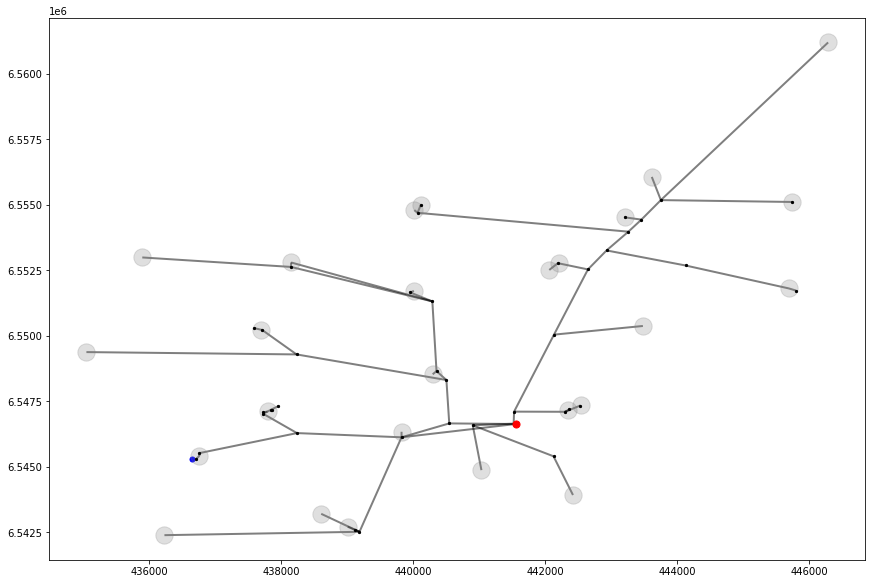

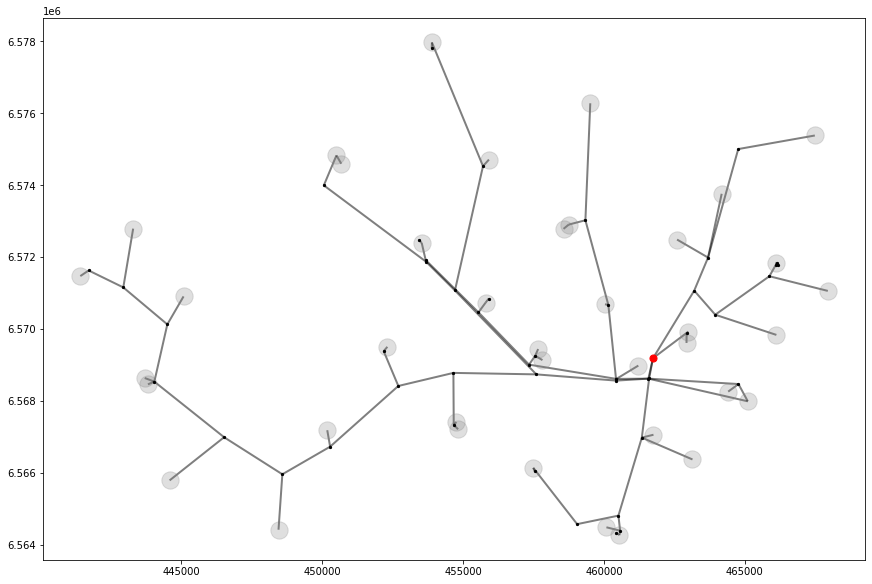

In [28]:
cmap=plt.get_cmap('tab20')
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    ax = fig.add_subplot(1,1,1)
    g_nodes = set(G.nodes)
    nodelist = list(set(wells) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=25, node_color="blue", ax=ax)
    nodelist = list(set(pads) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nodelist = list(set(juncs) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=5, node_color="black", ax=ax)
    nodelist = list(set(kns) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax)
    limits=plt.axis('on') # turns on axis
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
plt.show()

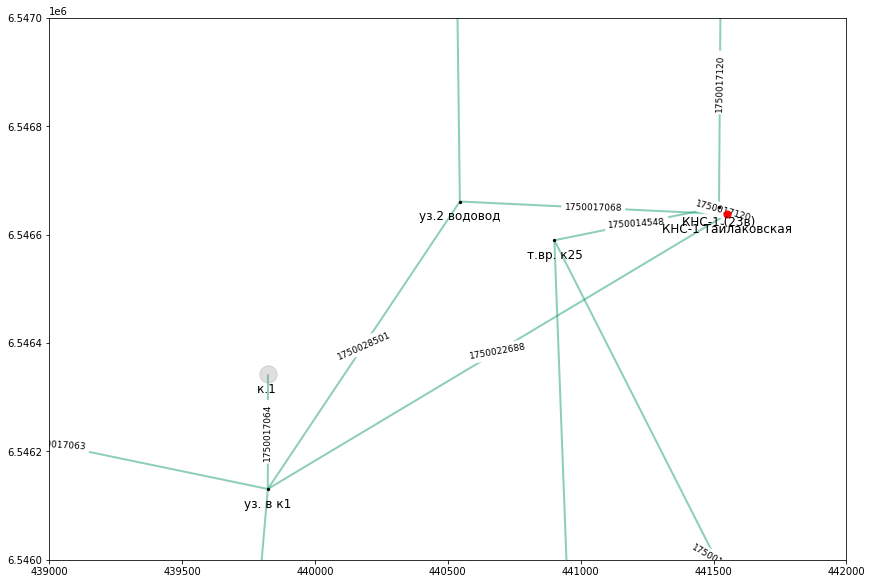

In [45]:
cmap=plt.get_cmap('Dark2').colors

fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for rs_id, clr in zip(rs_ids, cmap):
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    g_nodes = set(G.nodes)    
    nodelist = list(set(wells) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=25, node_color="blue", ax=ax)
    nodelist = list(set(pads) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nodelist = list(set(juncs) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=5, node_color="black", ax=ax)
    nodelist = list(set(kns) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax, edge_color=clr)
    
df = graph_df[["node_id_start", "node_id_end"]]
df.columns = ["source", "target"]
G = nx.from_pandas_edgelist(df)
lbls = {k : '\n\n'+node_labels[k] for k in pads}
lbls.update({k : '\n\n'+node_labels[k] for k in kns})
lbls.update({k : '\n\n'+node_labels[k] for k in juncs})
nx.draw_networkx_labels(G, sp, lbls, ax=ax)

df = graph_df[['part_id', 'node_id_start', 'node_id_end']]
edge_labels = dict(zip(zip(df.node_id_start, df.node_id_end), map(str, df.part_id)))
nx.draw_networkx_edge_labels(G, pos=sp, edge_labels=edge_labels, font_size=9)

limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlim(439000, 442000)
ax.set_ylim(6546000, 6547000)
plt.show()

In [56]:
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = full_df[full_df.index.isin(df.index)]
    fn = f'..\\data\\rs_{rs_id}.csv'
    df.to_csv(fn)

In [75]:
df = nodes_df
df2 = df[df.type == 1]
df2['kind'] = 'Q'
df2['Q'] = np.random.uniform(0, 100, size = len(df2))
df2['is_source'] = False
df2['P'] = None

df1 = df[df.type == 8]
df1['kind'] = 'P'
df1['Q'] = None
df1['is_source'] = True
df1['P'] = 200

df = pd.concat([df1, df2])
fn = f'..\\data\\boundaries.csv'
df.to_csv(fn)

<ipython-input-75-808bce7a2f24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kind'] = 'Q'
<ipython-input-75-808bce7a2f24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q'] = np.random.uniform(0, 100, size = len(df2))
<ipython-input-75-808bce7a2f24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [76]:
df_boundaries = df

In [80]:
df_b = df_boundaries
df_b['_q'] = df_b.Q.fillna(-100500)
df_b['_p'] = df_b.P.fillna(-100500)
df_b['value'] = df_b[["_q", "_p"]].max(axis=1)
df_b


,id,type,X,Y,name,H,kind,Q,is_source,P,_q,_p,value
11394,1750010931,8,441550.236490,6.546638e+06,КНС-1 Тайлаковская,86.90,P,None,True,200,-100500.000000,200,200.000000
11481,1750022767,8,461743.057104,6.569187e+06,КНС-2 Тайлаковская,79.70,P,None,True,200,-100500.000000,200,200.000000
11401,1750020918,1,445689.070000,6.551812e+06,к.27,74.00,Q,48.9587,False,None,48.958677,-100500,48.958677
11403,1750033323,1,440114.250000,6.554996e+06,к.118,86.64,Q,19.9889,False,None,19.988864,-100500,19.988864
11407,1750034909,1,442533.760000,6.547347e+06,к.122,88.00,Q,89.6491,False,None,89.649141,-100500,89.649141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11546,1750025776,1,450179.759832,6.567186e+06,к.68,65.10,Q,10.7843,False,None,10.784268,-100500,10.784268
11547,1751058780,1,450678.040000,6.574595e+06,к.41 Б,97.22,Q,20.0142,False,None,20.014244,-100500,20.014244
11548,1750040326,1,458567.608072,6.572784e+06,к.42 Б,86.00,Q,67.5314,False,None,67.531382,-100500,67.531382
11549,1750036786,1,443699.980000,6.568637e+06,к.56 Б,63.50,Q,12.7309,False,None,12.730851,-100500,12.730851


In [81]:
nodes_df

,id,type,X,Y,name,H
11377,1750021951,3,442645.974756,6.552537e+06,т.вр. в к13,84.00
11378,1750021954,3,443455.730000,6.554439e+06,т.вр. в к16,76.80
11379,1750021949,3,441527.403619,6.547110e+06,т.вр. в к22,84.50
11380,1750034365,3,445737.090000,6.555112e+06,вр.к.17,72.20
11381,1750021952,3,442927.825855,6.553262e+06,"т.вр. в к27, к24",73.60
...,...,...,...,...,...,...
11547,1751058780,1,450678.040000,6.574595e+06,к.41 Б,97.22
11548,1750040326,1,458567.608072,6.572784e+06,к.42 Б,86.00
11549,1750036786,1,443699.980000,6.568637e+06,к.56 Б,63.50
11551,1750034907,1,452312.910000,6.569504e+06,к.63,71.20


rs_id: 1750000976


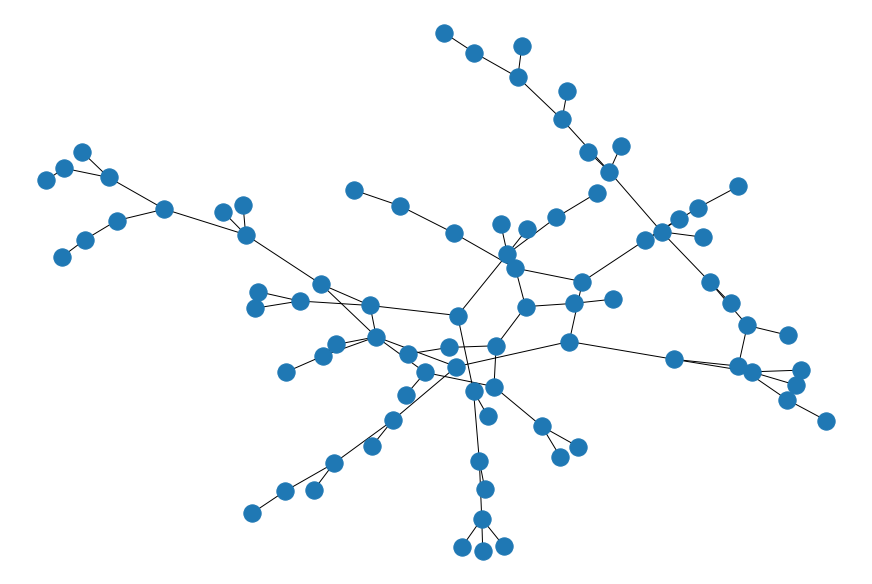

In [88]:
rs_id = 1750000976
print('rs_id:', rs_id)
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
graph_df = full_df[full_df.rs_schema_id == rs_id]
graph_df = graph_df[["node_id_start", "node_id_end", ]]
graph_df.columns = ["source", "target"]
G = nx.from_pandas_edgelist(graph_df)
nx.draw(G, ax=ax)
plt.show()